# Diferencias finitas para ecuaciones en derivadas parciales

## Ecuación del transporte

En esta clase vamos a emplear el método de diferencias finitas para el problema:

$$
\begin{cases}
\displaystyle\frac{\partial u(x,t)}{\partial t} + c\frac{\partial u(x,t)}{\partial x} = 0\ \ \ & \text{con } (x,t)\in (0,L)\times (0, T), \ \ \ c>0 \\
\\
u(x,0) = g(x) \ \  & x\in[0,L]\\
\\
u(0,t) = f(t)\ \ &t\in[0,T]
\end{cases}
$$




Vamos a:


* Plantear la discretización Forward en tiempo y Backward en espacio
* Hallar el error de truncado local
* Dar condiciones para la estabilidad en norma infinito
* Dar condiciones para la Convergencia

## Discretización:

Consideremos una grilla con pasos $\Delta x$ y $\Delta t$ para $x$ y $t$ respectivamente:

$$
\Delta x = \frac{L}{m}, \ \ \ \Delta t = \frac{T}{n}
$$



Asi:
    
$$
\begin{aligned}
x_i = i\Delta x, &\ \  \text{con } ~i=1,2,\dots,m \ \ \text{y el borde izquierdo es } x_0 = 0\\
\\
t_j = j\Delta t,  &\ \  \text{con} ~j=1,2,\dots,n 
\end{aligned}
$$

Usando el esquema Forward en tiempo y Backward en espacio:

$$
\begin{aligned}
u_t(x_i,t_j) &\approx \frac{u(x_i,t_{j+1}) -u(x_i,t_{j})}{\Delta t} \\
\\
u_x(x_i,t_j) &\approx \frac{u(x_i,t_j) -u(x_{i-1},t_{j})}{\Delta x} \\
\\
\end{aligned}
$$

$$
\text{con }i=1,2\dots,m,~~ j =1,2,\dots,n
$$



si denotamos $u_i^j$ la aproximación de $u$ en $(x_i,t_j)$ entonces nos queda el siguiente sistema de ecuaciones:

$$
\frac{u_i^{j+1}-u_i^j}{\Delta t} + c\frac{u_i^j - u_{i-1}^j}{\Delta x} =0  \ \ \ i=1,\dots, m, \ \ j =1,\dots n
$$






Reescribimos la expresión de arriba de tal forma que quede despejado $u_i^{j+1}$ y obtenemos:

$$
u_i^{j+1} = c\frac{\Delta t}{\Delta x}u_{i-1}^j + \left(1 - c\frac{\Delta t}{\Delta x}\right)u_i^j
$$



Observar que la ecuación de arriba nos dice la solución numerica en el tiempo $t_{j+1}$ en términos de lo que vale en el tiempo $t_j$. Así,  para un valor fijo de $j$ se tienen las ecuaciones:




$$\begin{aligned}
i = 1:\ \ \ \ u_1^{j+1} &= \left(1 - c\tfrac{\Delta t}{\Delta x}\right)u_1^j + \overbrace{c\tfrac{\Delta t}{\Delta x}u_{0}^j}^{\text{termino independiente}} \\
\\
i = 2:\ \ \ \ u_2^{j+1} &= c\tfrac{\Delta t}{\Delta x}u_{1}^j + \left(1 - c\tfrac{\Delta t}{\Delta x}\right)u_2^j\\
\\
&\vdots\\
\\
i = m:\ \ \ \ u_m^{j+1} &= c\tfrac{\Delta t}{\Delta x}u_{m-1}^j + \left(1 - c\tfrac{\Delta t}{\Delta x}\right)u_{m}^j\\
\end{aligned}
$$







Podemos escribir estas ecuaciones en forma matricial y en forma de 'evolución en el tiempo'





Denotemos como $\pmb u^{(j)}= [u_1^j, u_2^j,\dots,u_m^j]^T$ a la solución numérica en el tiempo $t_j$ y en todos los puntos $x_1,x_2,\dots,x_m$.


Entonces:

$$
\begin{equation}
\pmb u^{(j+1)} = A\pmb u^{(j)} + \pmb b_j \ \ \ \text{para cada } j=1,2\dots,n
\end{equation}
$$


con

$$
A = \begin{bmatrix} 
1-c\tfrac{\Delta t}{\Delta x} & 0                             & \cdots & & \\
\\
c\tfrac{\Delta t}{\Delta x}   &1-c\tfrac{\Delta t}{\Delta x}  & 0      &   &\\
\\
      0        & c\tfrac{\Delta t}{\Delta x}   &1-c\tfrac{\Delta t}{\Delta x}  &   0    &   \\
    \\
 \vdots        & \ddots   & \ddots                        &        & \\
   \\
 0              &  &   0    &  c\tfrac{\Delta t}{\Delta x}   &     1-c\tfrac{\Delta t}{\Delta x}   
\end{bmatrix}
$$






$$
\pmb b_j = \begin{bmatrix}
c\tfrac{\Delta t}{\Delta x}u_0^j\\
0\\
\vdots\\
0
\end{bmatrix}\ \ \ \text{la condicion de borde es } u_0^j = g(t_j) \ \ \text{para cada } j=1,2,\dots,n
$$


Además la condición inicial nos permite dar el $\pmb u^{(0)}$. En efecto:  

$$
\pmb u^{(0)} = [f(x_1), f(x_2),\dots,f(x_m)]^T
$$

## Error de truncado:


Recordemos que el esquema numérico nos quedó:

$$
\frac{u_i^{j+1}-u_i^j}{\Delta t} + c\frac{u_i^j - u_{i-1}^j}{\Delta x} =0  \ \ \ i=1,\dots, n, \ \ j =1,\dots m
$$











Para hallar el error de truncado en un paso (en $x$ y en $t$), reemplazamos la solución exacta del problema original (la ecuación del transporte en nuestro caso) en el esquema. Esta solución exacta no satisface el esquema numérico entonces:





$$
\frac{u(x_i,t_{j+1})-u(x_i,t_j)}{\Delta t} + c\frac{u(x_i,t_j) - u(x_{i-1},t_j)}{\Delta x} =0 + \overbrace{R(x_i, t_{j+1})}^{\text{Error de truncado}}  \ \ \ \text{para } i=1,\dots, m, \ \ j =1,\dots n
$$







Ahora usamos (como siempre!) Taylor para expresar $u(x_i, t_{j+1})$ y $u(x_{i-1},t_j)$ en términos de $u(x_i,t_j)$:







$$
u(x_i,t_{j+1}) = u(x_i, t_j+\Delta t) = u(x_i,t_j) + \Delta t u_t(x_i,t_j) +\tfrac{(\Delta t)^2}{2}u_{tt}(x_i,\mu_j)\ \ \text{con } \mu_j\in(t_j, t_{j+1})
$$






$$
u(x_{i-1},t_{j}) = u(x_i - \Delta x, t_j) = u(x_i,t_j) - (\Delta x) u_x(x_i,t_j) +\tfrac{(\Delta x)^2}{2}u_{xx}(\xi_i, t_j)\ \ \text{con } \xi_i\in(x_{i-1}, x_{i})
$$











Reemplazamos estas dos expresiones (y suponiendo las condiciones de suavidad necesarias)






$$
\frac{\overbrace{u(x_i,t_j)} + (\Delta t) u_t(x_i,t_j) +\tfrac{(\Delta t)^2}{2}u_{tt}(x_i,\mu_j)-\overbrace{u(x_i,t_j)}}{\Delta t} + c\frac{\overbrace{u(x_i,t_j)}^{} - \overbrace{u(x_i,t_j)}^{} + (\Delta x )u_x(x_i,t_j) -\tfrac{(\Delta x)^2}{2}u_{xx}(\xi_i, t_j)}{\Delta x} = R(x_i, t_{j+1})
$$







Simplificando:

$$
u_t(x_i,t_j) +\tfrac{\Delta t}{2}u_{tt}(x_i,\mu_j) + cu_x(x_i,t_j) - \tfrac{c\Delta x}{2}u_{xx}(\xi_i, t_j) = R(x_i,t_{j+1})
$$





usando el hecho que $u$ es solución de la ecuación en derivadas parciales: 


$$u_t(x_i,t_j) + cu_x(x_i,t_j) = 0 ~~\text{ para todo } x_i,~ t_j
$$


nos queda que:


$$
R(x_i,t_{j+1}) = \tfrac{\Delta t}{2}u_{tt}(x_i,\mu_j)- \tfrac{c\Delta x}{2}u_{xx}(\xi_i, t_j) = O(\Delta t) + O(\Delta x)
$$







Vemos que si $\Delta x, \Delta t \to 0$, $R(x_i, t_{j+1})\to 0$





## Estabilidad del método:


Este método nos permite hallar la solución numérica a un tiempo $t_j$ en términos del anterior, partiendo del conocimiento de la solción a tiempo $t_0 =0 $ (el paso 0 de la iteración) $\pmb u^{(0)}$.


Supongamos que por alguna razón no tenemos exactamente $\pmb u^{(0)}$ sino un estado aproximado $\tilde{\pmb u}^{(0)}$. Esto puede deberse a errores de redondeo por ejemplo.



Llamemos $\pmb\epsilon^{(0)} =\tilde{\pmb u}^{(0)} - \pmb u^{(0)}$


entonces en el paso $j$ del algoritmo:

$$
\pmb\epsilon^{(j)} =\tilde{\pmb u}^{(j)} - \pmb u^{(j)} = A\tilde{\pmb u}^{(j-1)} +\pmb b_{j-1}  - (A\pmb u^{(j-1)} +\pmb b_{j-1}) = A(\tilde{\pmb u}^{(j-1)} - \pmb u^{(j-1)})  \ \  \ \ \ \forall j
$$

es decir:

$$
\pmb\epsilon^{(j)} = A\pmb\epsilon^{(j-1)}
$$




o siguiendo con la recurrencia:

$$
\pmb\epsilon^{(j)} = A\pmb\epsilon^{(j-1)}= A^2\pmb\epsilon^{(j-2)} =\cdots = A^j\pmb\epsilon^{(0)}
$$





Esto nos dice que los errores se propagan como:

$$
\pmb\epsilon^{(j)} = A^j\pmb\epsilon^{(0)}, \ \ \ j=1,2,\dots   
$$



Decimos que el método es estable con respecto de una norma $|| \cdot ||$ si este error $\pmb\epsilon^{(j)}$ puede acotarse en términos de la perturbación inicial $\pmb \epsilon^{(0)}$. Es decir si:

$$
||\pmb\epsilon^{(j)}||\leq C|| \pmb\epsilon^{(0)}||
$$



Si para este caso particular nos preguntamos por la estabilidad con respecto de la norma infinito, entonces queremos que 


$$
||\pmb\epsilon^{(j)}||_\infty=||A^j \pmb\epsilon^{(0)}||_{\infty} \leq C|| \pmb\epsilon^{(0)}||_{\infty}
$$




La próxima clase vamos a ver de forma mas detallada normas matriciales y veremos que vale lo siguiente (stay tuned!):




$$
||\pmb\epsilon^{(j)}||_\infty=||A^j \pmb\epsilon^{(0)}||_{\infty}\leq ||A^j||_{\infty}||\pmb\epsilon^{(0)}||_{\infty}\leq||A||_{\infty}^j||\pmb\epsilon^{(0)}||_{\infty}
$$

La norma infinito de matrices es la norma inducida por la norma infinito de vectores: si $\pmb v\in \mathbb R^n$

$$
|| \pmb v||_\infty = \max_{1\leq k\leq n}\{|v_k| \}
$$

y vale (por ahora lo creemos!) que:


$$
||A||_{\infty} = \max_{1\leq i\leq m}\sum_{j=1}^n |a_{ij}|
$$




En nuestro caso la matriz $A$ es :

$$
A = \begin{bmatrix} 
1-c\tfrac{\Delta t}{\Delta x} & 0                             & \cdots & & \\
\\
c\tfrac{\Delta t}{\Delta x}   &1-c\tfrac{\Delta t}{\Delta x}  & 0      &   &\\
\\
      0        & c\tfrac{\Delta t}{\Delta x}   &1-c\tfrac{\Delta t}{\Delta x}  &   0    &   \\
    \\
 \vdots        & \ddots   & \ddots                        &        & \\
   \\
 0              &  &   0    &  c\tfrac{\Delta t}{\Delta x}   &     1-c\tfrac{\Delta t}{\Delta x}   
\end{bmatrix}
$$





si sumamos los modulos de los elementos sobre cada fila:

$$
i = 1:\ \ \ |1-c\tfrac{\Delta t}{\Delta x}|
$$


$$
i= 2,\dots, m:\ \ \  |c\tfrac{\Delta t}{\Delta x}| + |1-c\tfrac{\Delta t}{\Delta x}|
$$


Entonces 

$$
||A||_{\infty} = \max\left\{\left|1-c\tfrac{\Delta t}{\Delta x}\right|,~\left|c\tfrac{\Delta t}{\Delta x}\right| + \left|1-c\tfrac{\Delta t}{\Delta x}\right|\right\}
$$


Así, si 
$$
c\tfrac{\Delta t}{\Delta x}\leq1$$



entonces 

$$
||A||_\infty  = \max\left\{1-c\tfrac{\Delta t}{\Delta x}, ~ 1 \right\} = 1
$$

Es decir:

$$
\text{si  }c\tfrac{\Delta t}{\Delta x}\leq1 \ \ \ \text{entonces }  ||\pmb\epsilon^{(j)}||_\infty\leq ||\pmb\epsilon^{(0)}||_\infty\ \ \ \ j=1,\dots
$$

y el método es estable!



## Convergencia del método:

Para la probar la convergencia tenemos que ver que el error global en el paso $j$ del método (a tiempo $t_j$) tiende a 0 si $\Delta x, \Delta t\to 0$.

Sea 
$$
e_i^{j+1} = u(x_i, t_{j+1}) - u_i^{j+1}
$$

la diferencia entre la solución exacta del problema original y la solución del esquema numérico.





Sabemos que 

$$
u(x_i,t_{j+1}) = c\tfrac{\Delta t}{\Delta x}u(x_{i-1},t_j)~ + ~(1-c\tfrac{\Delta t}{\Delta x})u(x_i,t_j) ~+~\Delta t R(x_i,t_{j+1})
$$







entonces 

$$
\begin{aligned}
e_i^{j+1} =& ~ c\tfrac{\Delta t}{\Delta x}\left(u(x_{i-1},t_j)-u_{i-1}^j\right)~ + ~\left(1-c\tfrac{\Delta t}{\Delta x}\right)\left(u(x_i,t_j)- u_i^j\right)~ +~\Delta t R(x_i,t_{j+1})\\
\\
=& ~c\tfrac{\Delta t}{\Delta x}e_{i-1}^j ~+ ~(1-c\tfrac{\Delta t}{\Delta x})e_i^j ~+~ \Delta t R(x_i,t_{j+1}) ~~\text{para cada } i
\end{aligned}
$$




Definimos el error global a tiempo $t_j$ como

$$
E^{(j)} = \max_{1\leq i\leq m}~\{~|e_i^j|~\}
$$

y sea 
$$
R^{(j)} = \max_{1\leq i\leq m}~\{~|R(x_i,t_{j})|~\}
$$

como 

$$
\left|e_i^{j+1}\right| \leq c\left|\tfrac{\Delta t}{\Delta x}\right|\left|e_{i-1}^j\right| +  \left|1-c\tfrac{\Delta t}{\Delta x}\right|\left|e_i^j~\right| + \left|\Delta t R(x_i,t_{j+1})\right|
$$






Entonces

$$
E^{(j+1)} \leq c\left|\tfrac{\Delta t}{\Delta x}\right| E^{(j)} +  \left|1-c\tfrac{\Delta t}{\Delta x}\right|E^{(j)} + \left|\Delta t \right|R^{(j+1)}
$$


si vale la condición: $c\tfrac{\Delta t}{\Delta x}\leq 1$


Entonces:







$$
\begin{aligned}
E^{(j+1)} \leq& ~E^{(j)} + \Delta t R^{(j+1)}\\
\\
\leq &~ E^{(j-1)} + \Delta t R^{(j)} + \Delta t R^{(j+1)}\\
\vdots&\\
\leq & ~\Delta t R^{(1)} + \Delta t R^{(2)} + \cdots +\Delta t R^{(j+1)}\\
\\
 = &~ \Delta t\sum_{k=1}^{j+1} R^{(k)} \leq \Delta t\sum_{k=1}^{n} \max_{1\leq i\leq m}|R(x_i,t_{k})|\\
 \leq & ~ \Delta t \cdot n\cdot\max_{1\leq i\leq m}\max_{1\leq k\leq n}|R(x_i,t_{k})|\\
 \\
 =& ~ T(O(\Delta t) + O(\Delta x)) \ \ \ \text{usamos que } n =T/\Delta t
\end{aligned}
$$




Podemos decir que $E^{(j+1)}\to 0$ si $\Delta x, \Delta t\to 0$


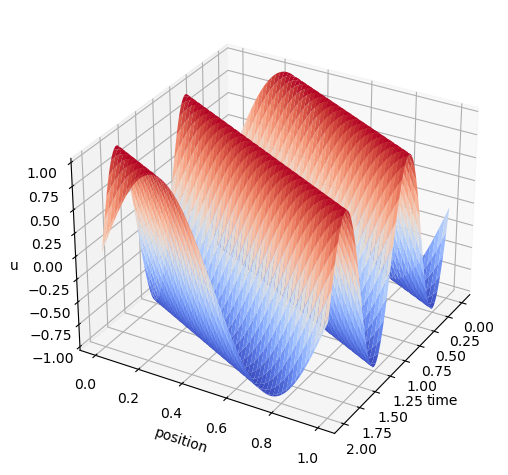

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import *
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def tridiagonal(dlow,d, dhigh):
    """
    Contructs the tridiagonal matrix with diagonals dlow, d, dhigh (subdiagonal, diagonal, supdiagonal)
    """
    return np.diag(dlow,-1)+ np.diag(d) + np.diag(dhigh,1)

def Transport(u0, u_boundary, c, delx, tspan, xspan, *param):
    """
    
    Parameters
    ----------
    u0 : function object --> initial condition
    u_boundary : function object --> boundary condition
    delx : float --> space step
    tspan : tuple --> limits of time interval
    xspan : tuple --> limits of space interval
    
    stability condition for this scheme is that c<=delx/delt so: delt <= delx/c
    
    Returns
    --------
    x : np.array--> x grid points
    t : np.array--> t grid points
    U : np.array (matrix) solution
    """
    delt = 0.7*delx/c
    
    t = np.arange(tspan[0], tspan[1], delt)
    x = np.arange(xspan[0], xspan[1], delx)
    
    N = len(x) 
    
    # define the tridiagonal matrix:
    courant = c*delt/delx
    d = (1 - courant)*np.ones(N)
    dlow = courant*np.ones(N-1)
    dhigh = np.zeros(N-1)
    
    A = tridiagonal(dlow, d, dhigh)
    
    # for each level of time, the solution at each point x is : u^j = Au^{j-1} + b_j
    
    U = np.zeros((N,len(t)))
    U[:,0] = u0(x, *param)
    
    for j in range(1, len(t)):
        U[:,j] = A@U[:,j-1] + courant*np.hstack((u_boundary(t[j]),np.zeros(N-1)))
    
    
    return x, t, U


## Ejemplo 1:

u0 = lambda x : np.sin(2*np.pi*x)
u_boundary = lambda t: np.sin(-2*c*np.pi*t)
c = 1
x,t, U = Transport(u0 , u_boundary, c, 1e-3, (0,2), (0,1)) 

# plot the solution
T, X = np.meshgrid(t,x)
fig1 = plt.figure(figsize=(12,6), dpi =80)
fig1.set_dpi(100)
ax1 = fig1.gca(projection='3d')
surf = ax1.plot_surface(T, X, U, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax1.set_xlabel('time')
ax1.set_ylabel('position')
ax1.set_zlabel('u')
ax1.view_init(30,30)
plt.show()


#plot the solution  each 50 steps of time

#fig, ax = plt.subplots()

#for i in range(len(t)):
#    if i%50 == 0:
#        ax.cla()
#        ax.plot(x,U[:,i])
#        ax.set_title('time sanpshot '+ str(round(t[i], 2)) + ' seconds')
#        plt.xlim(-0.5,1.5)
#        plt.pause(0.5)

#plt.show()